## **Fundamentals of Machine Learning: Final project**

This dataset contains simulated mushrooms for binary classification into edible and poisonous and it is available at the following link:

https://archive.ics.uci.edu/dataset/848/secondary+mushroom+dataset

Anna Bicelli, 
Alicja Dorobis (1736872),
Maximilian Lemberg

In [1]:
#Import libraries:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, classification_report
from scipy.stats import zscore
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score

## Dataset import and Data cleaning

In [2]:
# loading CSV file into DataFrame
pd.set_option('display.max_columns', None)
mushrooms_train_df = pd.read_csv('../data/MushroomDataset/primary_data.csv', delimiter=';')
mushrooms_2_df = pd.read_csv('../data/secondary_data.csv', delimiter=';')

In [3]:
mushrooms_train_df.head(10)

,family,name,class,cap-diameter,cap-shape,Cap-surface,cap-color,does-bruise-or-bleed,gill-attachment,gill-spacing,gill-color,stem-height,stem-width,stem-root,stem-surface,stem-color,veil-type,veil-color,has-ring,ring-type,Spore-print-color,habitat,season
0,Amanita Family,Fly Agaric,p,"[10, 20]","[x, f]","[g, h]","[e, o]",[f],[e],NaN,[w],"[15, 20]","[15, 20]",[s],[y],[w],[u],[w],[t],"[g, p]",NaN,[d],"[u, a, w]"
1,Amanita Family,Panther Cap,p,"[5, 10]","[p, x]",[g],[n],[f],[e],NaN,[w],"[6, 10]","[10, 20]",NaN,[y],[w],[u],[w],[t],[p],NaN,[d],"[u, a]"
2,Amanita Family,False Panther Cap,p,"[10, 15]","[x, f]",NaN,"[g, n]",[f],[e],NaN,[w],"[10, 12]","[10, 20]",NaN,NaN,[w],[u],[w],[t],"[e, g]",NaN,[d],"[u, a]"
3,Amanita Family,The Blusher,e,"[5, 15]","[x, f]",NaN,[n],[t],NaN,NaN,[w],"[7, 15]","[10, 25]",[b],NaN,[w],[u],[w],[t],[g],NaN,[d],"[u, a]"
4,Amanita Family,Death Cap,p,"[5, 12]","[x, f]",[h],[r],[f],NaN,[c],[w],"[10, 12]","[10, 20]",NaN,NaN,[w],[u],[w],[t],"[g, p]",NaN,[d],"[u, a]"
5,Amanita Family,False Death Cap,e,"[4, 9]",[x],NaN,"[w, y]",[f],[e],NaN,[w],"[5, 7]","[10, 15]",[b],NaN,"[w, y]",[u],"[y, w]",[t],[g],NaN,[d],"[u, a]"
6,Amanita Family,Destroying Angel,p,"[5, 10]",[b],[t],[w],[f],[e],[c],[w],"[10, 15]","[10, 15]",NaN,[y],[w],[u],[w],[t],"[l, e]",NaN,[d],"[u, a]"
7,Amanita Family,Tawny Grisette,e,"[4, 8]","[c, x]","[h, t]",[n],[f],[e],NaN,[w],"[10, 15]","[10, 15]",NaN,[s],"[w, n]",[u],[w],[f],[f],NaN,[d],"[u, a]"
8,Lepiota Family,Parasol Mushroom,e,"[10, 25]","[p, f]",[y],"[w, n]",[f],NaN,NaN,[w],"[15, 35]","[15, 25]",[s],NaN,[n],NaN,NaN,[t],[m],NaN,"[m, d]","[u, a]"
9,Lepiota Family,Shaggy Parasol,e,"[12, 18]",[x],"[e, y]",[n],[t],[e],NaN,[w],"[8, 12]","[15, 20]",NaN,NaN,[w],NaN,NaN,[t],NaN,NaN,"[g, d]","[u, a]"


In [4]:
mushrooms_2_df.head(20)

,class,cap-diameter,cap-shape,cap-surface,cap-color,does-bruise-or-bleed,gill-attachment,gill-spacing,gill-color,stem-height,stem-width,stem-root,stem-surface,stem-color,veil-type,veil-color,has-ring,ring-type,spore-print-color,habitat,season
0,p,15.26,x,g,o,f,e,NaN,w,16.95,17.09,s,y,w,u,w,t,g,NaN,d,w
1,p,16.60,x,g,o,f,e,NaN,w,17.99,18.19,s,y,w,u,w,t,g,NaN,d,u
2,p,14.07,x,g,o,f,e,NaN,w,17.80,17.74,s,y,w,u,w,t,g,NaN,d,w
3,p,14.17,f,h,e,f,e,NaN,w,15.77,15.98,s,y,w,u,w,t,p,NaN,d,w
4,p,14.64,x,h,o,f,e,NaN,w,16.53,17.20,s,y,w,u,w,t,p,NaN,d,w
5,p,15.34,x,g,o,f,e,NaN,w,17.84,18.79,s,y,w,u,w,t,p,NaN,d,u
6,p,14.85,f,h,o,f,e,NaN,w,17.71,16.89,s,y,w,u,w,t,g,NaN,d,w
7,p,14.86,x,h,e,f,e,NaN,w,17.03,17.44,s,y,w,u,w,t,p,NaN,d,u
8,p,12.85,f,g,o,f,e,NaN,w,17.27,18.69,s,y,w,u,w,t,p,NaN,d,a
9,p,13.55,f,g,e,f,e,NaN,w,16.04,16.88,s,y,w,u,w,t,p,NaN,d,w


I can already see that there are a lot of NaN values in both datasets that I'm going to explore later

In [5]:
# first dataset dimensions
mushrooms_train_df.shape

(173, 23)

In [6]:
#second dataset dimensions
mushrooms_2_df.shape

(61069, 21)

we decide to work on the second dataset where we've more entries since in the first one there aren't enough

In [7]:
mushrooms_2_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61069 entries, 0 to 61068
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   class                 61069 non-null  object 
 1   cap-diameter          61069 non-null  float64
 2   cap-shape             61069 non-null  object 
 3   cap-surface           46949 non-null  object 
 4   cap-color             61069 non-null  object 
 5   does-bruise-or-bleed  61069 non-null  object 
 6   gill-attachment       51185 non-null  object 
 7   gill-spacing          36006 non-null  object 
 8   gill-color            61069 non-null  object 
 9   stem-height           61069 non-null  float64
 10  stem-width            61069 non-null  float64
 11  stem-root             9531 non-null   object 
 12  stem-surface          22945 non-null  object 
 13  stem-color            61069 non-null  object 
 14  veil-type             3177 non-null   object 
 15  veil-color         

we have 3 numerical variables and others are categorical

In [8]:
mushrooms_2_df.columns

Index(['class', 'cap-diameter', 'cap-shape', 'cap-surface', 'cap-color',
       'does-bruise-or-bleed', 'gill-attachment', 'gill-spacing', 'gill-color',
       'stem-height', 'stem-width', 'stem-root', 'stem-surface', 'stem-color',
       'veil-type', 'veil-color', 'has-ring', 'ring-type', 'spore-print-color',
       'habitat', 'season'],
      dtype='object')

Replacing '-' with '_'

In [9]:
mushrooms_2_df.columns = mushrooms_2_df.columns.map(lambda x: x.replace('-', '_'))

In [10]:
#check columns' names
mushrooms_2_df.columns

Index(['class', 'cap_diameter', 'cap_shape', 'cap_surface', 'cap_color',
       'does_bruise_or_bleed', 'gill_attachment', 'gill_spacing', 'gill_color',
       'stem_height', 'stem_width', 'stem_root', 'stem_surface', 'stem_color',
       'veil_type', 'veil_color', 'has_ring', 'ring_type', 'spore_print_color',
       'habitat', 'season'],
      dtype='object')

In [11]:
print(sum(mushrooms_2_df.isna().sum()))
print(mushrooms_2_df.duplicated().sum())

307463
146


There are null values and also duplicates--> I can handle missing values in different ways and check duplicates to know if it's better to remove them

In [12]:
mushrooms_2_df.isnull().sum()

class                       0
cap_diameter                0
cap_shape                   0
cap_surface             14120
cap_color                   0
does_bruise_or_bleed        0
gill_attachment          9884
gill_spacing            25063
gill_color                  0
stem_height                 0
stem_width                  0
stem_root               51538
stem_surface            38124
stem_color                  0
veil_type               57892
veil_color              53656
has_ring                    0
ring_type                2471
spore_print_color       54715
habitat                     0
season                      0
dtype: int64

Numerical variables don't have any null value.

I can see better also in this way:

In [13]:
#check percentage of NA values in object variables with NA
print("Percentage of null values in columns of object type:")
print(f"\npercentage of cap_surface NA value: \t\t\t\t{(mushrooms_2_df['cap_surface'].isna().sum() / len(mushrooms_2_df)) * 100:.2f}%")
print(f"\npercentage of gill_attachment NA value: \t\t\t{(mushrooms_2_df['gill_attachment'].isna().sum() / len(mushrooms_2_df)) * 100:.2f}%")
print(f"\npercentage of gill_spacing NA value: \t\t\t\t{(mushrooms_2_df['gill_spacing'].isna().sum() / len(mushrooms_2_df)) * 100:.2f}%")
print(f"\npercentage of stem_root NA value: \t\t\t\t{(mushrooms_2_df['stem_root'].isna().sum() / len(mushrooms_2_df)) * 100:.2f}%")
print(f"\npercentage of stem_surface NA value: \t\t\t\t{(mushrooms_2_df['stem_surface'].isna().sum() / len(mushrooms_2_df)) * 100:.2f}%")
print(f"\npercentage of veil_type NA value: \t\t\t\t{(mushrooms_2_df['veil_type'].isna().sum() / len(mushrooms_2_df)) * 100:.2f}%")
print(f"\npercentage of veil_color NA value: \t\t\t\t{(mushrooms_2_df['veil_color'].isna().sum() / len(mushrooms_2_df)) * 100:.2f}%")
print(f"\npercentage of ring_type NA value: \t\t\t\t{(mushrooms_2_df['ring_type'].isna().sum() / len(mushrooms_2_df)) * 100:.2f}%")
print(f"\npercentage of spore_print_color NA value: \t\t\t{(mushrooms_2_df['spore_print_color'].isna().sum() / len(mushrooms_2_df)) * 100:.2f}%")

Percentage of null values in columns of object type:

percentage of cap_surface NA value: 				23.12%

percentage of gill_attachment NA value: 			16.18%

percentage of gill_spacing NA value: 				41.04%

percentage of stem_root NA value: 				84.39%

percentage of stem_surface NA value: 				62.43%

percentage of veil_type NA value: 				94.80%

percentage of veil_color NA value: 				87.86%

percentage of ring_type NA value: 				4.05%

percentage of spore_print_color NA value: 			89.60%


check if the presence of one of the features is a storng indicator of poisonous or edible 

Based on these informations:<br>
- there are a lot of Nan values in the columns **stem_root**, **stem_surface**,**veil_type**, **veil_color**, **spore_orint_color** --> more than 50% of the values are null --> WE DROP THESE COLUMNS
- **replace** the null values related the the others objects variables with their **mode** that is the value that occurs the  most in the variable, so it doesn't change the distirbution a lot

In [14]:
mushrooms_2_df.drop(columns = ["stem_root","stem_surface", "veil_type", "veil_color", "spore_print_color"], axis=1, inplace = True)

In [15]:
cap_surface_mode = mushrooms_2_df['cap_surface'].mode()[0]
mushrooms_2_df['cap_surface'] = mushrooms_2_df['cap_surface'].fillna(cap_surface_mode)
gill_attachment_mode = mushrooms_2_df['gill_attachment'].mode()[0]
mushrooms_2_df['gill_attachment'] = mushrooms_2_df['gill_attachment'].fillna(gill_attachment_mode)
gill_spacing_mode = mushrooms_2_df['cap_surface'].mode()[0]
mushrooms_2_df['gill_spacing'] = mushrooms_2_df['gill_spacing'].fillna(gill_spacing_mode)
ring_type_mode = mushrooms_2_df['ring_type'].mode()[0]
mushrooms_2_df['ring_type'] = mushrooms_2_df['ring_type'].fillna(ring_type_mode)

In [16]:
mushrooms_2_df.shape

(61069, 16)

I see that the size of the dataframe has reduced after removing the five unwanted columns.<br>
Now I check again for NA values as I did before

In [17]:
# check null values
mushrooms_2_df.isnull().sum()

class                   0
cap_diameter            0
cap_shape               0
cap_surface             0
cap_color               0
does_bruise_or_bleed    0
gill_attachment         0
gill_spacing            0
gill_color              0
stem_height             0
stem_width              0
stem_color              0
has_ring                0
ring_type               0
habitat                 0
season                  0
dtype: int64

Now we want to explore the duplicates to understand what is better to do:

In [18]:
# Identify duplicates in each column 
for column in mushrooms_2_df.columns:
    duplicates = mushrooms_2_df[column].duplicated(keep=False)  # 'keep=False' marks all duplicates as True
    if duplicates.any():
        print(f"Column '{column}' has duplicates:")
        print(mushrooms_2_df.loc[duplicates, column].drop_duplicates())
    else:
        print(f"Column '{column}' has no duplicates.")

Column 'class' has duplicates:
0       p
1059    e
Name: class, dtype: object
Column 'cap_diameter' has duplicates:
0        15.26
1        16.60
2        14.07
3        14.17
4        14.64
         ...  
58702    23.52
58710    22.97
58717    21.43
58743    22.53
58756    22.92
Name: cap_diameter, Length: 2060, dtype: float64
Column 'cap_shape' has duplicates:
0        x
3        f
354      p
2118     b
2471     c
4236     s
55068    o
Name: cap_shape, dtype: object
Column 'cap_surface' has duplicates:
0        g
3        h
706      t
2824     y
3177     e
7060     s
7413     l
7766     d
12002    w
19768    i
27181    k
Name: cap_surface, dtype: object
Column 'cap_color' has duplicates:
0        o
3        e
353      n
706      g
1412     r
1765     w
1771     y
3531     p
4589     u
4590     b
4944     l
15885    k
Name: cap_color, dtype: object
Column 'does_bruise_or_bleed' has duplicates:
0       f
1059    t
Name: does_bruise_or_bleed, dtype: object
Column 'gill_attachment' has d

We don't remove duplicates since there are not duplicate rows but categorical values in the columns, for this reason there are duplicates. Deleting them we may delete some relevant information from the dataset

Now that all the null values are settled I can proceed with the understanding of the values in the dataset, finding correlations between them.

In [19]:
mushrooms_2_df.head(5)

,class,cap_diameter,cap_shape,cap_surface,cap_color,does_bruise_or_bleed,gill_attachment,gill_spacing,gill_color,stem_height,stem_width,stem_color,has_ring,ring_type,habitat,season
0,p,15.26,x,g,o,f,e,t,w,16.95,17.09,w,t,g,d,w
1,p,16.60,x,g,o,f,e,t,w,17.99,18.19,w,t,g,d,u
2,p,14.07,x,g,o,f,e,t,w,17.80,17.74,w,t,g,d,w
3,p,14.17,f,h,e,f,e,t,w,15.77,15.98,w,t,p,d,w
4,p,14.64,x,h,o,f,e,t,w,16.53,17.20,w,t,p,d,w


# Outlier detection

Number of outliers: 2262


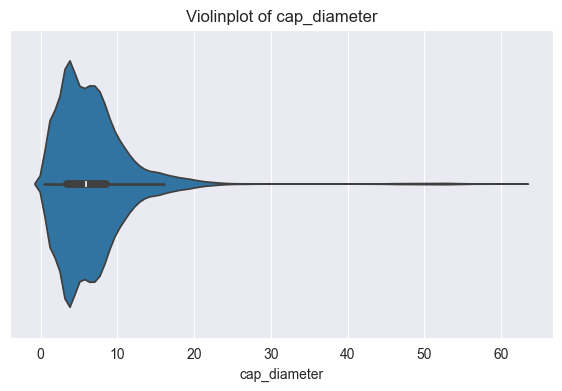

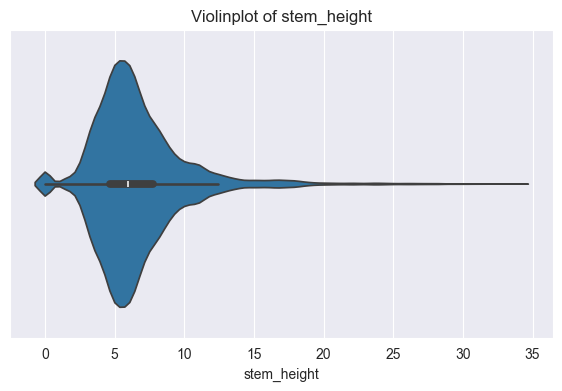

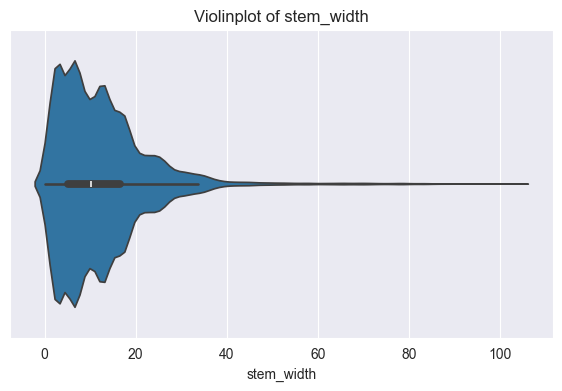

In [20]:
z_scores = mushrooms_2_df[['cap_diameter', 'stem_height', 'stem_width']].apply(zscore)
outliers = (z_scores.abs() > 3).any(axis=1)
print(f"Number of outliers: {outliers.sum()}")


for col in ['cap_diameter', 'stem_height', 'stem_width']:
    plt.figure(figsize=(7, 4))
    sns.violinplot(x=mushrooms_2_df[col])
    plt.title(f"Violinplot of {col}")
    plt.show()



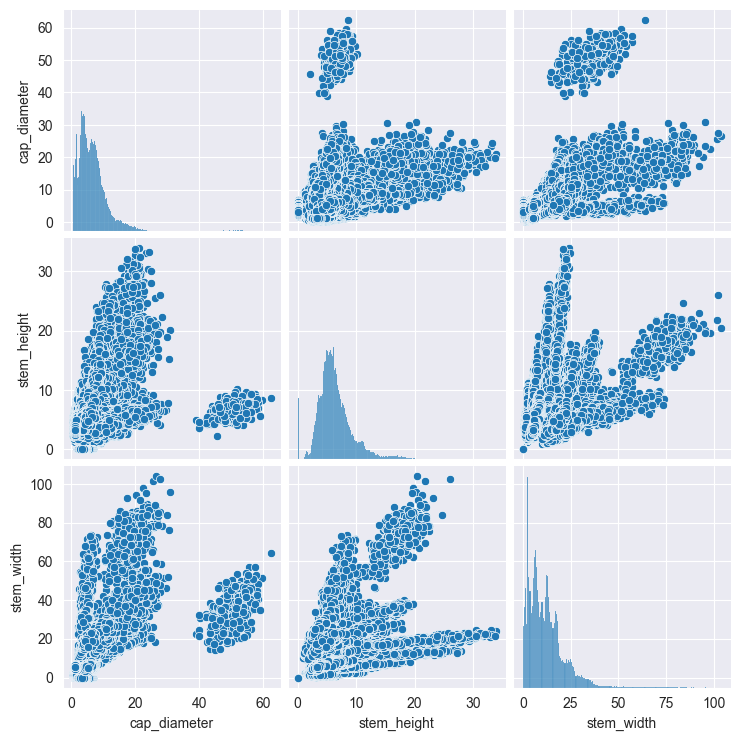

In [21]:
sns.pairplot(mushrooms_2_df[['cap_diameter', 'stem_height', 'stem_width']])
plt.show()


# Feature Engineering
Create the Mushroom Size and Stem Size Features

In [22]:
# creating a new feature 'mushroom_size' as the product of cap_diameter and stem_height
mushrooms_2_df['mushroom_size'] = mushrooms_2_df['cap_diameter'] * mushrooms_2_df['stem_height']
mushrooms_2_df['stem_size'] = mushrooms_2_df['stem_width'] * mushrooms_2_df['stem_height']

display(mushrooms_2_df.head(5))

,class,cap_diameter,cap_shape,cap_surface,cap_color,does_bruise_or_bleed,gill_attachment,gill_spacing,gill_color,stem_height,stem_width,stem_color,has_ring,ring_type,habitat,season,mushroom_size,stem_size
0,p,15.26,x,g,o,f,e,t,w,16.95,17.09,w,t,g,d,w,258.6570,289.6755
1,p,16.60,x,g,o,f,e,t,w,17.99,18.19,w,t,g,d,u,298.6340,327.2381
2,p,14.07,x,g,o,f,e,t,w,17.80,17.74,w,t,g,d,w,250.4460,315.7720
3,p,14.17,f,h,e,f,e,t,w,15.77,15.98,w,t,p,d,w,223.4609,252.0046
4,p,14.64,x,h,o,f,e,t,w,16.53,17.20,w,t,p,d,w,241.9992,284.3160


# One-hot encoding categorical features

In [23]:
print(mushrooms_2_df.apply(lambda col: col.unique()))

class                                                              [p, e]
cap_diameter            [15.26, 16.6, 14.07, 14.17, 14.64, 15.34, 14.8...
cap_shape                                           [x, f, p, b, c, s, o]
cap_surface                             [g, h, t, y, e, s, l, d, w, i, k]
cap_color                            [o, e, n, g, r, w, y, p, u, b, l, k]
does_bruise_or_bleed                                               [f, t]
gill_attachment                                     [e, a, d, s, x, p, f]
gill_spacing                                                 [t, c, d, f]
gill_color                           [w, n, p, u, b, g, y, r, e, o, k, f]
stem_height             [16.95, 17.99, 17.8, 15.77, 16.53, 17.84, 17.7...
stem_width              [17.09, 18.19, 17.74, 15.98, 17.2, 18.79, 16.8...
stem_color                        [w, y, n, u, b, l, r, p, e, k, g, o, f]
has_ring                                                           [t, f]
ring_type                             

In [24]:
#choosing categorical features
categorical_features = [
    'cap_shape', 'cap_surface', 'cap_color', 'does_bruise_or_bleed',
    'gill_attachment', 'gill_spacing', 'gill_color', 'stem_color',
    'has_ring', 'ring_type', 'habitat', 'season'
]

In [25]:
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(sparse_output=False)
one_hot_encoded = encoder.fit_transform(mushrooms_2_df[categorical_features])

one_hot_df = pd.DataFrame(one_hot_encoded, columns=encoder.get_feature_names_out(categorical_features))

# concatenate the one-hot encoded df with the original mushroom df
df_encoded = pd.concat([mushrooms_2_df, one_hot_df], axis=1)

# dropping the original columns with categorical features
df_encoded = df_encoded.drop(categorical_features, axis=1)
print(f"Encoded Mushroom dataset:")
display(df_encoded.head(5))

Encoded Mushroom dataset:


,class,cap_diameter,stem_height,stem_width,mushroom_size,stem_size,cap_shape_b,cap_shape_c,cap_shape_f,cap_shape_o,cap_shape_p,cap_shape_s,cap_shape_x,cap_surface_d,cap_surface_e,cap_surface_g,cap_surface_h,cap_surface_i,cap_surface_k,cap_surface_l,cap_surface_s,cap_surface_t,cap_surface_w,cap_surface_y,cap_color_b,cap_color_e,cap_color_g,cap_color_k,cap_color_l,cap_color_n,cap_color_o,cap_color_p,cap_color_r,cap_color_u,cap_color_w,cap_color_y,does_bruise_or_bleed_f,does_bruise_or_bleed_t,gill_attachment_a,gill_attachment_d,gill_attachment_e,gill_attachment_f,gill_attachment_p,gill_attachment_s,gill_attachment_x,gill_spacing_c,gill_spacing_d,gill_spacing_f,gill_spacing_t,gill_color_b,gill_color_e,gill_color_f,gill_color_g,gill_color_k,gill_color_n,gill_color_o,gill_color_p,gill_color_r,gill_color_u,gill_color_w,gill_color_y,stem_color_b,stem_color_e,stem_color_f,stem_color_g,stem_color_k,stem_color_l,stem_color_n,stem_color_o,stem_color_p,stem_color_r,stem_color_u,stem_color_w,stem_color_y,has_ring_f,has_ring_t,ring_type_e,ring_type_f,ring_type_g,ring_type_l,ring_type_m,ring_type_p,ring_type_r,ring_type_z,habitat_d,habitat_g,habitat_h,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w,season_a,season_s,season_u,season_w
0,p,15.26,16.95,17.09,258.6570,289.6755,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,p,16.60,17.99,18.19,298.6340,327.2381,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,p,14.07,17.80,17.74,250.4460,315.7720,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,p,14.17,15.77,15.98,223.4609,252.0046,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,p,14.64,16.53,17.20,241.9992,284.3160,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


# Encoding the dependent variable

In [26]:
print(df_encoded['class'].value_counts(normalize=True))
df_encoded['class'] = df_encoded['class'].map({'e': 0, 'p': 1})
df_encoded.head(5)

class
p    0.554913
e    0.445087
Name: proportion, dtype: float64


,class,cap_diameter,stem_height,stem_width,mushroom_size,stem_size,cap_shape_b,cap_shape_c,cap_shape_f,cap_shape_o,cap_shape_p,cap_shape_s,cap_shape_x,cap_surface_d,cap_surface_e,cap_surface_g,cap_surface_h,cap_surface_i,cap_surface_k,cap_surface_l,cap_surface_s,cap_surface_t,cap_surface_w,cap_surface_y,cap_color_b,cap_color_e,cap_color_g,cap_color_k,cap_color_l,cap_color_n,cap_color_o,cap_color_p,cap_color_r,cap_color_u,cap_color_w,cap_color_y,does_bruise_or_bleed_f,does_bruise_or_bleed_t,gill_attachment_a,gill_attachment_d,gill_attachment_e,gill_attachment_f,gill_attachment_p,gill_attachment_s,gill_attachment_x,gill_spacing_c,gill_spacing_d,gill_spacing_f,gill_spacing_t,gill_color_b,gill_color_e,gill_color_f,gill_color_g,gill_color_k,gill_color_n,gill_color_o,gill_color_p,gill_color_r,gill_color_u,gill_color_w,gill_color_y,stem_color_b,stem_color_e,stem_color_f,stem_color_g,stem_color_k,stem_color_l,stem_color_n,stem_color_o,stem_color_p,stem_color_r,stem_color_u,stem_color_w,stem_color_y,has_ring_f,has_ring_t,ring_type_e,ring_type_f,ring_type_g,ring_type_l,ring_type_m,ring_type_p,ring_type_r,ring_type_z,habitat_d,habitat_g,habitat_h,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w,season_a,season_s,season_u,season_w
0,1,15.26,16.95,17.09,258.6570,289.6755,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,1,16.60,17.99,18.19,298.6340,327.2381,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,1,14.07,17.80,17.74,250.4460,315.7720,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,1,14.17,15.77,15.98,223.4609,252.0046,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,1,14.64,16.53,17.20,241.9992,284.3160,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


The dataset is relatively well balanced.

# Train Test Validation split

In [27]:
X = df_encoded.drop(columns=['class'])
y = df_encoded['class']

Current split of the original data:
* 60% for training (since 0.75 * 0.8 = 0.6)
* 20% for validation
* 20% for testing

In [28]:
X_temp, X_test, y_temp, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_temp, y_temp, test_size=0.25, random_state=42)

## Standarising Numerical Features with RobustScaler
Scales features using statistics that are robust to outliers. This Scaler removes the median and scales the data according to the quantile range (defaults to IQR: Interquartile Range). The IQR is the range between the 1st quartile (25th quantile) and the 3rd quartile (75th quantile).

In [29]:
from sklearn.preprocessing import StandardScaler, RobustScaler

numerical_features = ["cap_diameter", "stem_height","stem_width", 'mushroom_size', 'stem_size' ]

#Keeping a copy of the original (non-scaled) data
X_train_non_scaled = X_train.copy()
X_val_non_scaled = X_val.copy()
X_test_non_scaled = X_test.copy()

#Initialize and fit the RobustScaler only on the training set
scaler = RobustScaler()
scaler.fit(X_train[numerical_features])


X_train[numerical_features] = scaler.transform(X_train[numerical_features])
X_val[numerical_features] = scaler.transform(X_val[numerical_features])
X_test[numerical_features] = scaler.transform(X_test[numerical_features])

#Verify the results
print("Original Training Set (Non-Scaled):")
display(X_train_non_scaled.head(5))

print("\nScaled Training Set:")
display(X_train[numerical_features].head(5))

print("\nScaled Validation Set:")
display(X_val[numerical_features].head(5))

print("\nScaled Test Set:")
display(X_test[numerical_features].head(5))

Original Training Set (Non-Scaled):


,cap_diameter,stem_height,stem_width,mushroom_size,stem_size,cap_shape_b,cap_shape_c,cap_shape_f,cap_shape_o,cap_shape_p,cap_shape_s,cap_shape_x,cap_surface_d,cap_surface_e,cap_surface_g,cap_surface_h,cap_surface_i,cap_surface_k,cap_surface_l,cap_surface_s,cap_surface_t,cap_surface_w,cap_surface_y,cap_color_b,cap_color_e,cap_color_g,cap_color_k,cap_color_l,cap_color_n,cap_color_o,cap_color_p,cap_color_r,cap_color_u,cap_color_w,cap_color_y,does_bruise_or_bleed_f,does_bruise_or_bleed_t,gill_attachment_a,gill_attachment_d,gill_attachment_e,gill_attachment_f,gill_attachment_p,gill_attachment_s,gill_attachment_x,gill_spacing_c,gill_spacing_d,gill_spacing_f,gill_spacing_t,gill_color_b,gill_color_e,gill_color_f,gill_color_g,gill_color_k,gill_color_n,gill_color_o,gill_color_p,gill_color_r,gill_color_u,gill_color_w,gill_color_y,stem_color_b,stem_color_e,stem_color_f,stem_color_g,stem_color_k,stem_color_l,stem_color_n,stem_color_o,stem_color_p,stem_color_r,stem_color_u,stem_color_w,stem_color_y,has_ring_f,has_ring_t,ring_type_e,ring_type_f,ring_type_g,ring_type_l,ring_type_m,ring_type_p,ring_type_r,ring_type_z,habitat_d,habitat_g,habitat_h,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w,season_a,season_s,season_u,season_w
34228,7.25,4.68,10.27,33.9300,48.0636,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
27383,18.64,7.61,29.80,141.8504,226.7780,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
20485,3.28,4.38,6.80,14.3664,29.7840,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
24854,7.58,4.45,15.22,33.7310,67.7290,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
32006,3.62,4.16,2.87,15.0592,11.9392,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0



Scaled Training Set:


,cap_diameter,stem_height,stem_width,mushroom_size,stem_size
34228,0.270751,-0.407767,0.005296,0.017551,-0.091235
27383,2.521739,0.540453,1.729038,2.249834,1.687184
20485,-0.513834,-0.504854,-0.300971,-0.387113,-0.273139
24854,0.335968,-0.482201,0.442189,0.013435,0.104459
32006,-0.446640,-0.576052,-0.647838,-0.372783,-0.450716



Scaled Validation Set:


,cap_diameter,stem_height,stem_width,mushroom_size,stem_size
49324,0.241107,-0.103560,0.156222,0.141079,0.100464
49904,1.337945,0.860841,1.789938,1.565995,2.039814
35056,-0.381423,0.417476,-0.320388,-0.093556,-0.096113
18521,0.086957,0.401294,0.377758,0.254339,0.465778
25646,0.199605,-0.071197,0.629303,0.130919,0.417481



Scaled Test Set:


,cap_diameter,stem_height,stem_width,mushroom_size,stem_size
11541,-0.901186,-0.495146,-0.788173,-0.563867,-0.513352
35700,-0.290514,-0.569579,-0.353045,-0.302981,-0.311214
55781,0.662055,-0.466019,0.932921,0.174857,0.361010
29303,-0.537549,-0.909385,-0.406002,-0.479689,-0.394789
46601,-0.428854,-0.029126,-0.325684,-0.235349,-0.189967


## Correlation between the numeric features

In [30]:
low_variance_cols = [col for col in X_train.columns if X_train[col].var() < 0.01]
print("Low-variance columns (training set):", low_variance_cols)

Low-variance columns (training set): ['stem_color_b', 'stem_color_l', 'stem_color_r', 'ring_type_m', 'habitat_p', 'habitat_u', 'habitat_w']


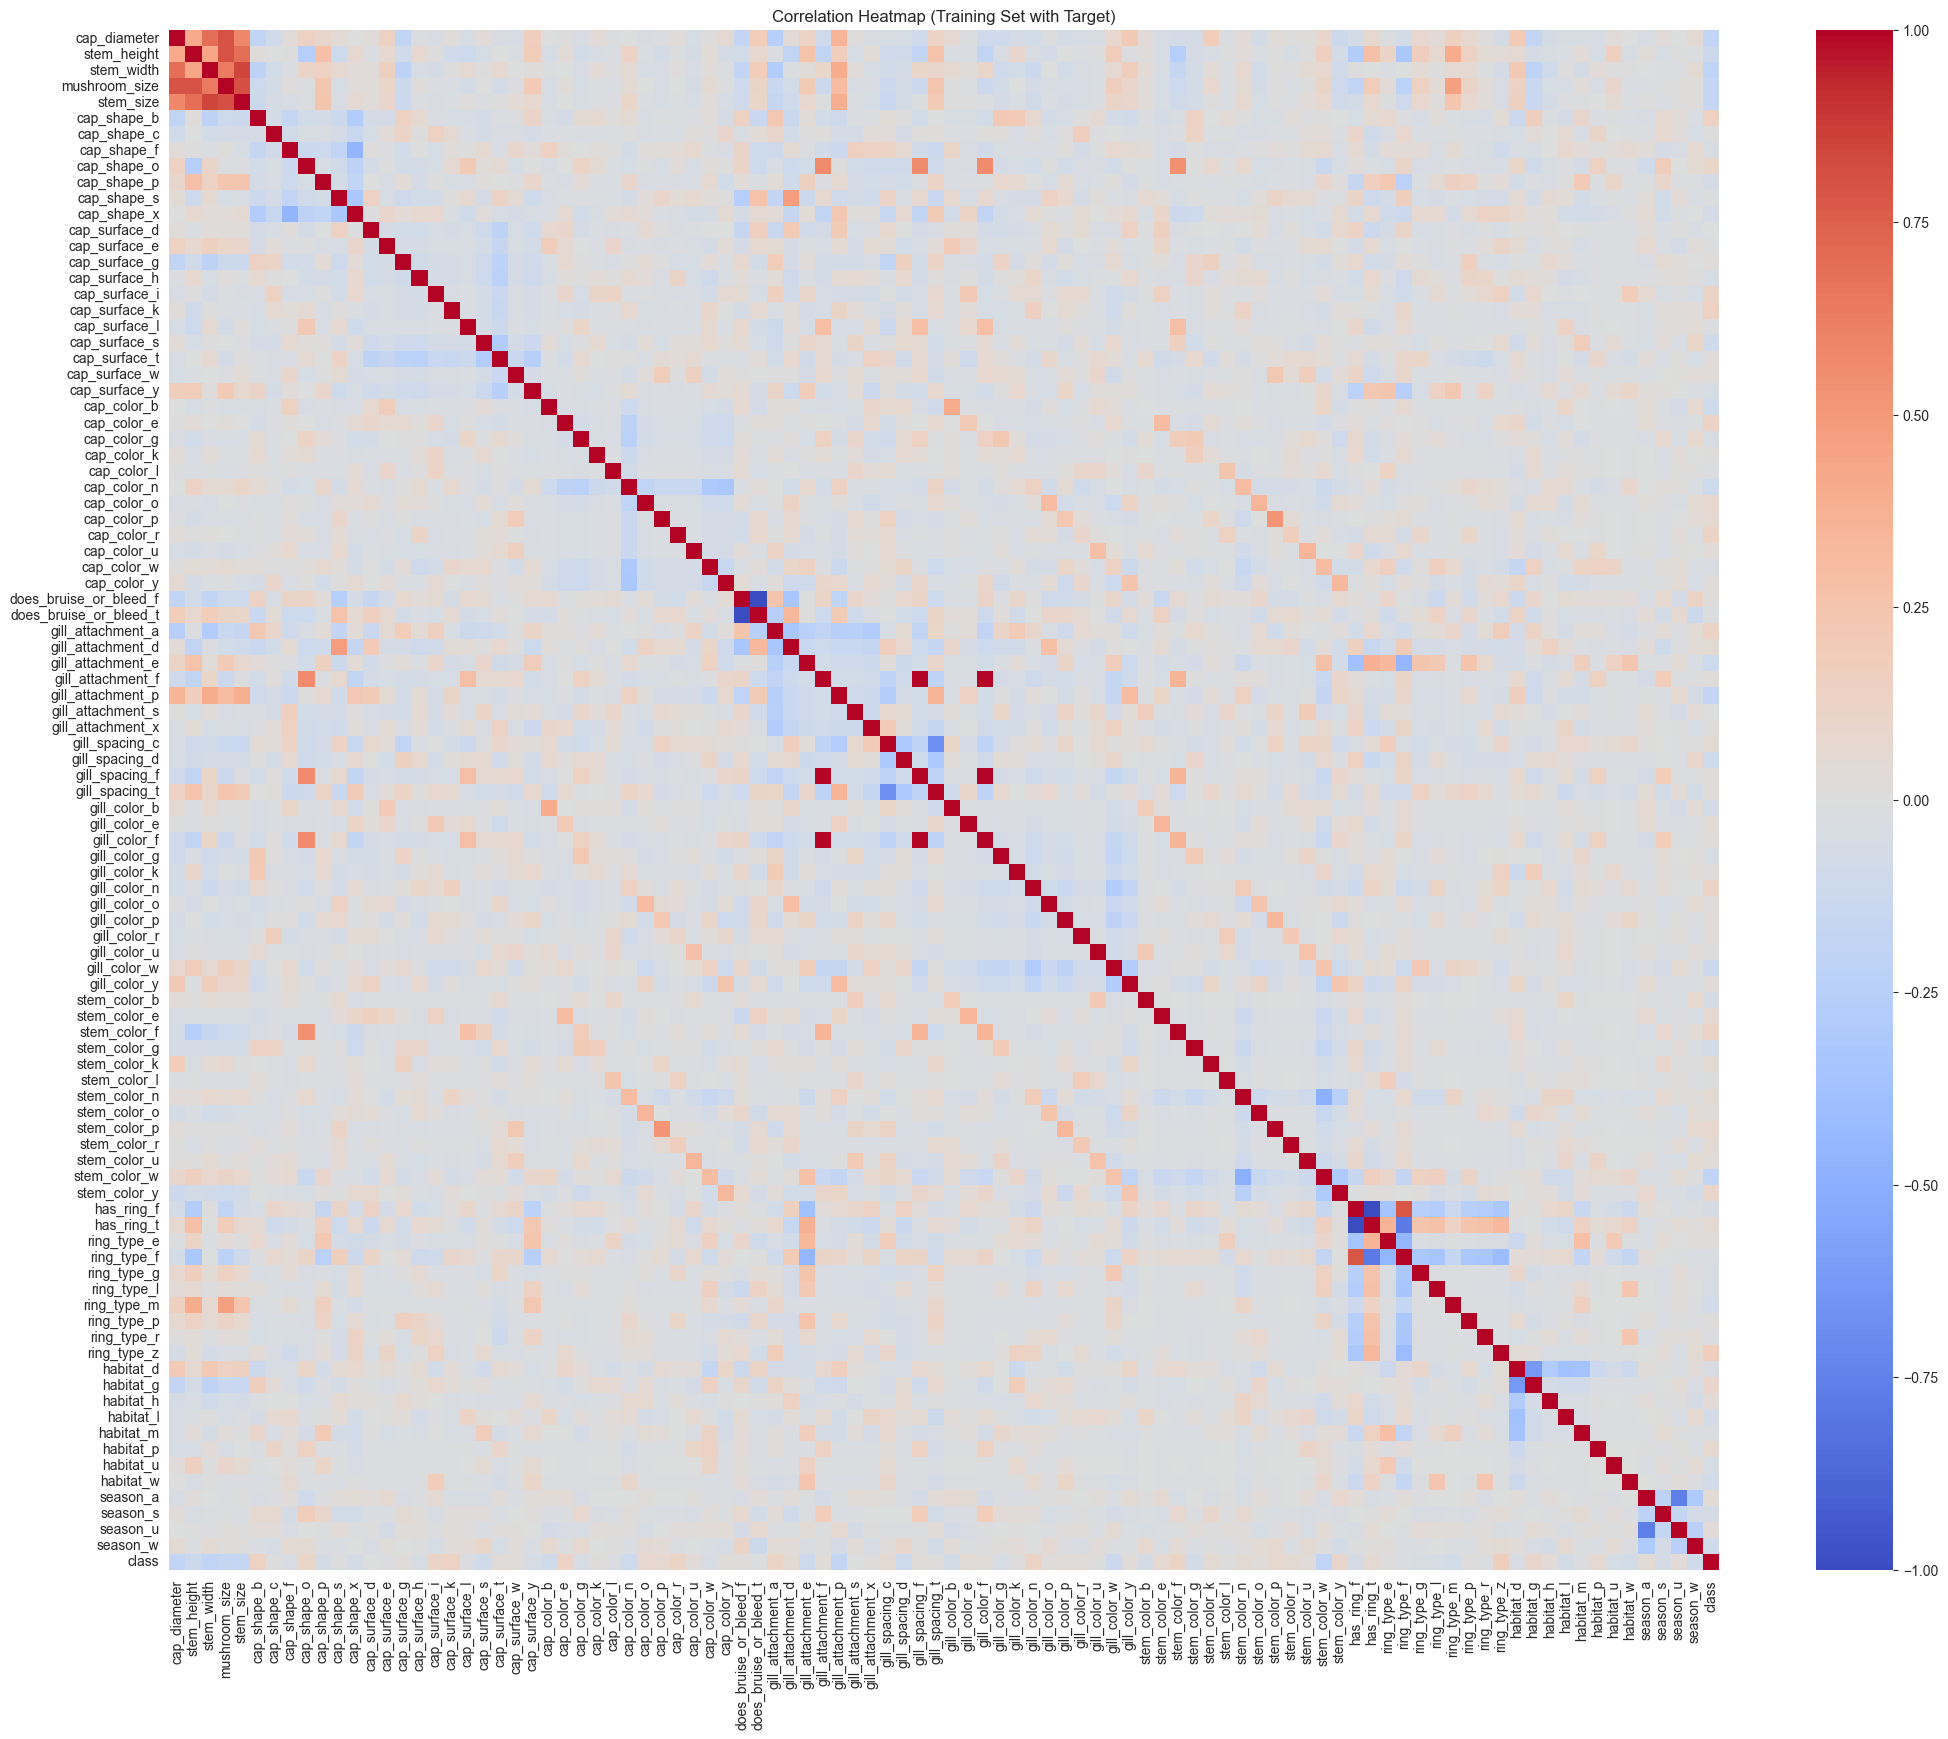

In [31]:
# temporarily adding y_train to X_train for correlation calculation
train_with_target = X_train.copy()
train_with_target['class'] = y_train

# computing correlation matrix
correlation_matrix = train_with_target.corr()

# plotting
plt.figure(figsize=(25, 20))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm')
plt.title('Correlation Heatmap (Training Set with Target)')
plt.show()


- We can see that for the class column, there are no strong correlations with any of the features showing that no feature clearly indicates if a mushroom is poisonous or edible
- But we do see some strong correlations between some of the features. Lets find the top 20 correlations

In [32]:
correlation_pairs = correlation_matrix.where(~np.eye(correlation_matrix.shape[0], dtype=bool)).stack()
correlation_df = correlation_pairs.reset_index()
correlation_df.columns = ['Feature 1', 'Feature 2', 'Correlation']

# ignore duplicate pairs
correlation_df['Ordered Pair'] = correlation_df[['Feature 1', 'Feature 2']].apply(lambda x: tuple(sorted(x)), axis=1)
unique_correlation_df = correlation_df.drop_duplicates(subset='Ordered Pair').drop(columns='Ordered Pair')
unique_correlation_df = unique_correlation_df.reindex(unique_correlation_df['Correlation'].abs().sort_values(ascending=False).index)
top_correlations = unique_correlation_df.head(20)
print("Top unique correlations (positive and negative):")
print(top_correlations)

Top unique correlations (positive and negative):
                   Feature 1               Feature 2  Correlation
3360  does_bruise_or_bleed_f  does_bruise_or_bleed_t    -1.000000
3845       gill_attachment_f          gill_spacing_f     1.000000
3849       gill_attachment_f            gill_color_f     1.000000
4419          gill_spacing_f            gill_color_f     1.000000
7008              has_ring_f              has_ring_t    -1.000000
193               stem_width               stem_size     0.845466
288            mushroom_size               stem_size     0.805586
2               cap_diameter           mushroom_size     0.799833
97               stem_height           mushroom_size     0.799571
7105              has_ring_t             ring_type_f    -0.782104
7010              has_ring_f             ring_type_f     0.782104
8737                season_a                season_u    -0.764735
98               stem_height               stem_size     0.695069
1               cap_diamete

Some features are perfect predictors of each other. They will be dropped to avoid multicollinearity. 
*  features (does_bruise_or_bleed_f, has_ring_f) can only take the value of true or false.
* features season_a and season_u have a correlation of -0.77
* gill_color_f and gill_attachment_f and gill_spacing_f are all perfectly correlated beacuse the signifiy the that the mushroom has no gill attachement, two will be dropped.
* has_ring_t and ring_type_f have a negative correlation of -0.78, as ring_type_f only occurs in the mushrooms which do not have a ring. 

In [33]:
columns_to_drop = ['does_bruise_or_bleed_f', 'has_ring_f', 'gill_color_f', 'gill_spacing_f', 'ring_type_f']
#dropping the data
X_train = X_train.drop(columns=columns_to_drop)
X_val = X_val.drop(columns=columns_to_drop)
X_test = X_test.drop(columns=columns_to_drop)

## Checking feature redundancy with PCA

In [34]:
pca = PCA(n_components=2)
pca.fit(X_train)  # Fit PCA only on the training set

X_train_pca = pca.transform(X_train)

print(f"Explained variance ratio (training set PCA): {pca.explained_variance_ratio_}")

Explained variance ratio (training set PCA): [0.37401833 0.06692299]


The two principles PC1 and PC2 explain 37.4% of our variance which is pretty low. This means we probably have some redundant / less informative features. We should consider dropping them.

In [35]:
pca_components = pd.DataFrame(
    data=pca.components_,
    columns=X_train.columns,
    index=[f"PC{i+1}" for i in range(pca.n_components_)]
)
print("PCA Loadings:")
print(pca_components.T.head(15))

PCA Loadings:
                    PC1       PC2
cap_diameter   0.371147 -0.458578
stem_height    0.393104  0.624174
stem_width     0.322792 -0.394457
mushroom_size  0.556171  0.116663
stem_size      0.524610 -0.032523
cap_shape_b   -0.018464  0.084172
cap_shape_c   -0.005583  0.015259
cap_shape_f   -0.001933 -0.021815
cap_shape_o   -0.002869 -0.091927
cap_shape_p    0.022281  0.043082
cap_shape_s   -0.005237 -0.095145
cap_shape_x    0.011806  0.066374
cap_surface_d  0.001830 -0.030617
cap_surface_e  0.011226 -0.010349
cap_surface_g -0.019333  0.046353


In [36]:
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)  # train only on training data
# computing feature importances
importances = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': rf.feature_importances_
}).sort_values(by='Importance', ascending=False)

print("Top 10 Feature Importances:")
print(importances.head(10))

Top 10 Feature Importances:
                   Feature  Importance
2               stem_width    0.086052
4                stem_size    0.056268
1              stem_height    0.056048
3            mushroom_size    0.052852
0             cap_diameter    0.046944
68            stem_color_w    0.037052
44          gill_spacing_d    0.028741
35  does_bruise_or_bleed_t    0.026361
43          gill_spacing_c    0.023916
55            gill_color_w    0.021571


- We can see that stem_width and stem_height are the most important features again
- We can also see that there are features that have very low importance. We could consider dropping them

Conclusion: The features stem_height, cap_diameter, stem_width, stem_size, and mushroom_size are some of the most important according to the Random Forest model. This shows they each capture valuable and unique information for the classification task. While stem_size and mushroom_size are created from stem_height, cap_diameter, and stem_width, their similarity comes from their design, not redundancy.

Combining these features into a single measure could reduce the unique information they provide. To keep the model easy to interpret and maintain its performance, we chose not to combine these features, even though they have similar contributions in the first principal component from PCA.

## Visualizing the Data for a better understanding of the real world

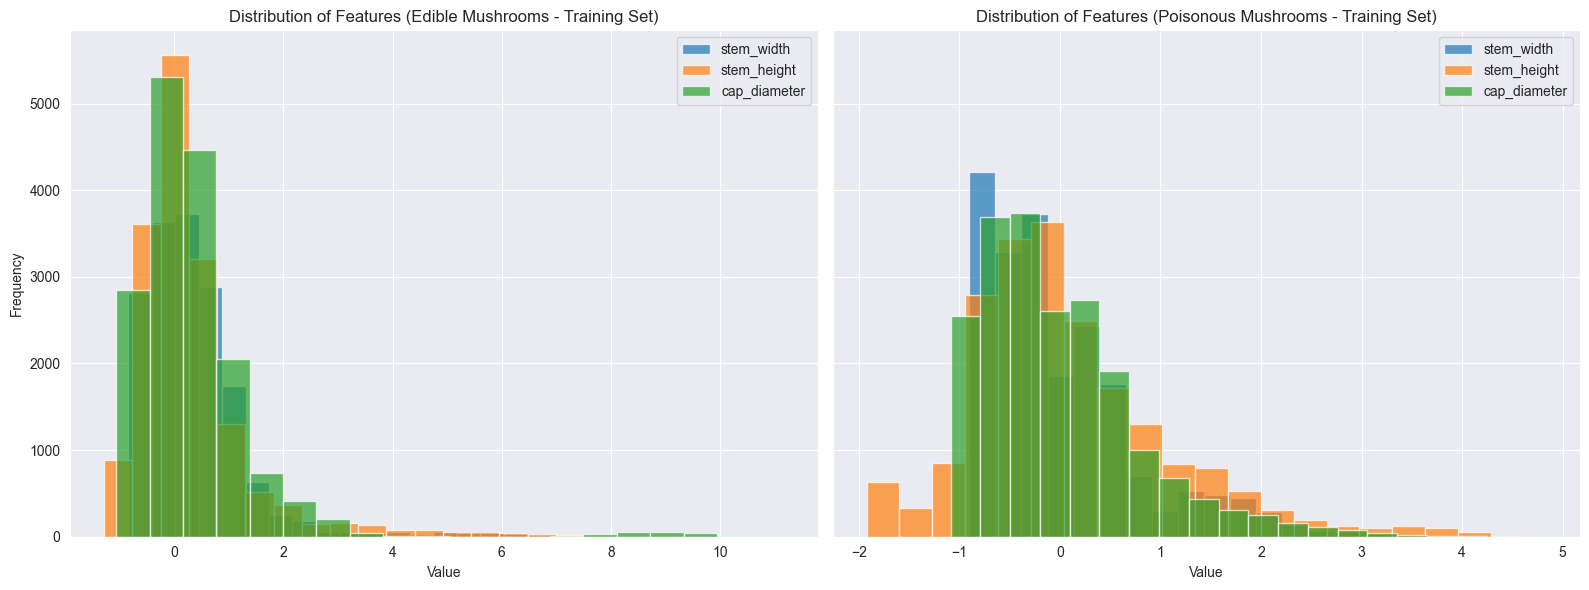

In [37]:
edible_data = X_train[y_train == 0]
poisonous_data = X_train[y_train == 1]


features = ['stem_width', 'stem_height', 'cap_diameter']
fig, axes = plt.subplots(1, 2, figsize=(16, 6), sharey=True)

# distribution for edible mushrooms
for feature in features:
    axes[0].hist(edible_data[feature], bins=20, alpha=0.7, label=feature)
axes[0].set_title('Distribution of Features (Edible Mushrooms - Training Set)')
axes[0].set_xlabel('Value')
axes[0].set_ylabel('Frequency')
axes[0].legend()

# distribution for poisonous mushrooms
for feature in features:
    axes[1].hist(poisonous_data[feature], bins=20, alpha=0.7, label=feature)
axes[1].set_title('Distribution of Features (Poisonous Mushrooms - Training Set)')
axes[1].set_xlabel('Value')
axes[1].legend()

# plotting
plt.tight_layout()
plt.show()

We can see that:
- Edible mushrooms tend to be larger in height and cap diameter. So they mostly look thin, high and have a large cap diameter
- Poisonous mushrooms tend to have a large stem width but a smaller height and cap diameter.
- Therefore, we decided to go back and add feature "mushroom size" and "stem_size" to capture the non-linear relationship.

### Function for model evaluation

In [38]:
def evaluate_classifier(clf, X_train, X_test, y_train, y_test, name):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    y_proba = clf.predict_proba(X_test)[:, 1] if hasattr(clf, "predict_proba") else np.zeros(len(y_test)) #probability estimates only for classifiers that provide it
    
    print(f"--- {name} ---")
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("Precision:", precision_score(y_test, y_pred))
    print("Recall:", recall_score(y_test, y_pred))
    print("F1 Score:", f1_score(y_test, y_pred))
    print("ROC-AUC Score:", roc_auc_score(y_test, y_proba))
    print("\nClassification Report:\n", classification_report(y_test, y_pred))

     # plotting the confusion matrix
    plt.figure(figsize=(5, 3))
    sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d", cmap="coolwarm")
    plt.title(f"Confusion Matrix for {name}")
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.show()
    print("\n")

# Logistic Regression

In [39]:
# simplest model evaluated on the validation set
model = LogisticRegression(random_state=42, max_iter=1000)
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000, random_state=42)

--- Simplest Logistic Regression (Validation Set) ---
Accuracy: 0.7812346487637137
Precision: 0.8026079136690647
Recall: 0.7980625931445604
F1 Score: 0.8003287998804364
ROC-AUC Score: 0.859646039839878

Classification Report:
               precision    recall  f1-score   support

           0       0.76      0.76      0.76      5504
           1       0.80      0.80      0.80      6710

    accuracy                           0.78     12214
   macro avg       0.78      0.78      0.78     12214
weighted avg       0.78      0.78      0.78     12214



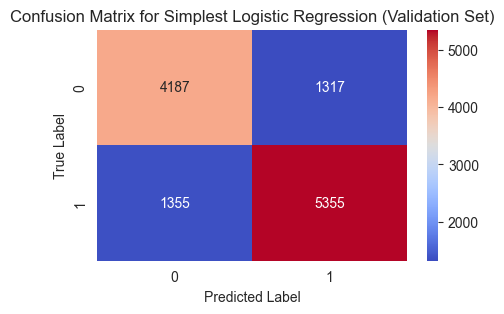

In [40]:
evaluate_classifier(model, X_train, X_val, y_train, y_val, "Simplest Logistic Regression (Validation Set)")

### Applying GridSearch to find best hyperparameters

In [41]:
parameter_grid = [
    {'C': [0.01, 0.1, 1, 10, 100], 'penalty': ['l2'], 'solver': ['lbfgs']},
    {'C': [0.01, 0.1, 1, 10, 100], 'penalty': ['l1', 'l2'], 'solver': ['liblinear']},
    ]

# grid Search with 5-fold Cross-Validation

grid_search_lr = GridSearchCV(
    estimator=LogisticRegression(random_state=42, max_iter=5000),
    param_grid=parameter_grid,
    cv=5,  # 5-fold cross-validation
    scoring='accuracy',  # optimizing on accuracy
    verbose=1,  # displaying the process
)

Fitting 5 folds for each of 15 candidates, totalling 75 fits
Best Hyperparameters: {'C': 0.1, 'penalty': 'l1', 'solver': 'liblinear'}
Solver used in the best model: liblinear
--- Best Logistic Regression (Validation Set) ---
Accuracy: 0.7851645652529884
Precision: 0.8062050359712231
Recall: 0.8016393442622951
F1 Score: 0.8039157076670154
ROC-AUC Score: 0.8589471848681247

Classification Report:
               precision    recall  f1-score   support

           0       0.76      0.77      0.76      5504
           1       0.81      0.80      0.80      6710

    accuracy                           0.79     12214
   macro avg       0.78      0.78      0.78     12214
weighted avg       0.79      0.79      0.79     12214



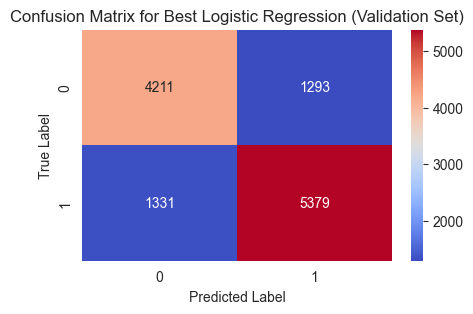

In [42]:
#fitting the model
grid_search_lr.fit(X_train, y_train)

#best parameters
best_params = grid_search_lr.best_params_
best_model = grid_search_lr.best_estimator_

print("Best Hyperparameters:", best_params)
print("Solver used in the best model:", best_model.solver)

evaluate_classifier(best_model, X_train, X_val, y_train, y_val, "Best Logistic Regression (Validation Set)")

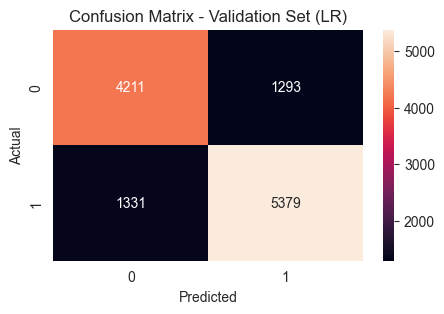

Classification Report (Validation Set):
               precision    recall  f1-score   support

           0       0.76      0.77      0.76      5504
           1       0.81      0.80      0.80      6710

    accuracy                           0.79     12214
   macro avg       0.78      0.78      0.78     12214
weighted avg       0.79      0.79      0.79     12214

Validation ROC AUC: 0.8589471848681247


In [43]:
y_val_pred = best_model.predict(X_val)
plt.figure(figsize=(5, 3))
sns.heatmap(confusion_matrix(y_val, y_val_pred), annot=True, fmt='d')
plt.title("Confusion Matrix - Validation Set (LR)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

print("Classification Report (Validation Set):\n", classification_report(y_val, y_val_pred))
print("Validation ROC AUC:", roc_auc_score(y_val, best_model.predict_proba(X_val)[:,1]))

### Checking the penalization with L1 Regularization

Features reduced to zero by L1 regularization:


,Feature,Coefficient
66,stem_color_r,0.0
63,stem_color_n,0.0
49,gill_color_k,0.0
53,gill_color_r,0.0
52,gill_color_p,0.0
78,habitat_d,0.0
36,gill_attachment_a,0.0
72,ring_type_g,0.0
6,cap_shape_c,0.0
39,gill_attachment_f,0.0


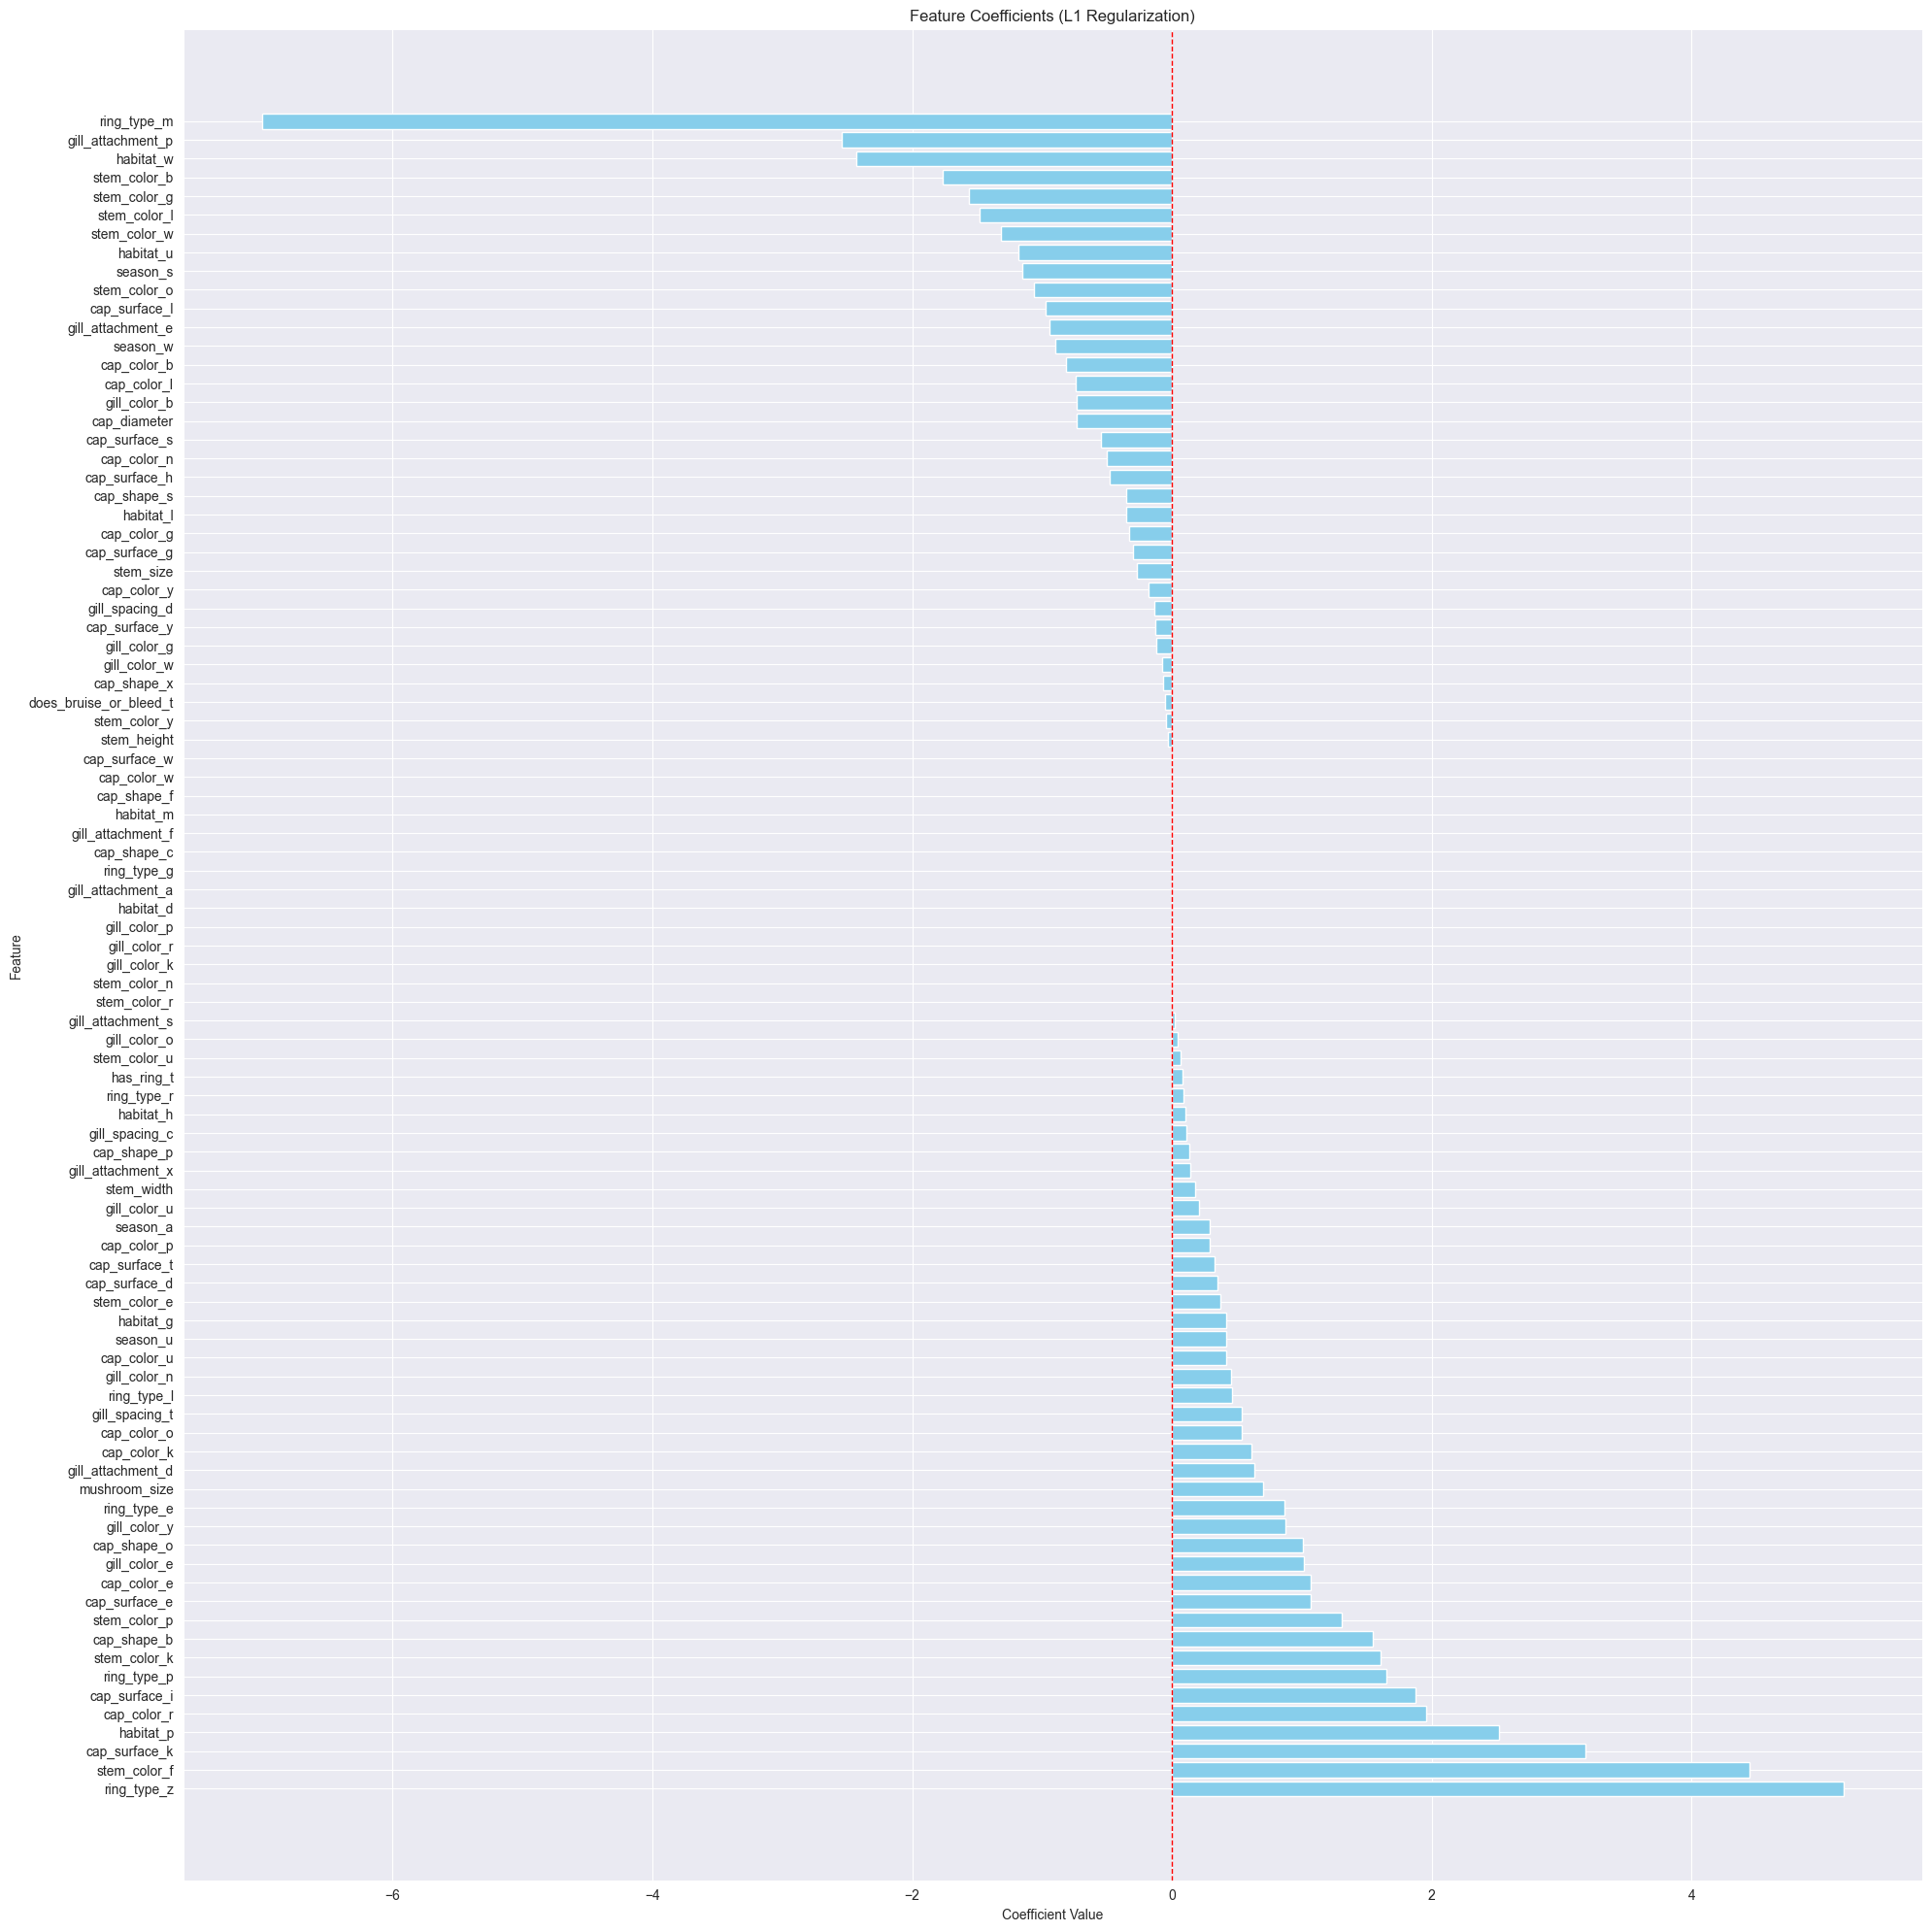

In [44]:
# extracting coefficients from the best logistic regression model
coefficients = best_model.coef_[0]  
features = X_train.columns  # feature names from the training set

# creating a df for visualization
coef_df = pd.DataFrame({
    'Feature': features,
    'Coefficient': coefficients
}).sort_values(by='Coefficient', ascending=False)

# printing features with coefficients shrunk to zero
zero_coeff_features = coef_df[coef_df['Coefficient'] == 0]
print("Features reduced to zero by L1 regularization:")
display(zero_coeff_features)


plt.figure(figsize=(20, 20))
plt.barh(coef_df['Feature'], coef_df['Coefficient'], color='skyblue')
plt.axvline(0, color='red', linestyle='--', linewidth=1)
plt.title('Feature Coefficients (L1 Regularization)')
plt.xlabel('Coefficient Value')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()


## Final performance evaluation on the test set

--- Final Evaluation of Logistic Regression (Test Set) ---
Accuracy: 0.7824627476666121
Precision: 0.8073475385745775
Recall: 0.8032163742690058
F1 Score: 0.8052766581165262
ROC-AUC Score: 0.858836595738198

Classification Report:
               precision    recall  f1-score   support

           0       0.75      0.76      0.75      5374
           1       0.81      0.80      0.81      6840

    accuracy                           0.78     12214
   macro avg       0.78      0.78      0.78     12214
weighted avg       0.78      0.78      0.78     12214



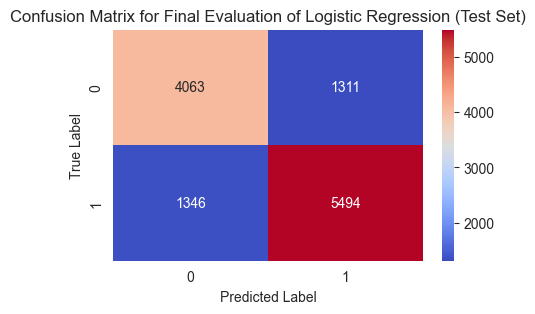

In [45]:
# combining the training and validation sets
X_combined = pd.concat([X_train, X_val], ignore_index=True)
y_combined = pd.concat([y_train, y_val], ignore_index=True)

# retraining with best parameters on combined training and validation data
final_clf = LogisticRegression(**best_params)
final_clf.fit(X_combined, y_combined)

evaluate_classifier(best_model, X_combined, X_test, y_combined, y_test, "Final Evaluation of Logistic Regression (Test Set)")

Classification Report (Test Set):
               precision    recall  f1-score   support

           0       0.75      0.76      0.75      5374
           1       0.81      0.80      0.81      6840

    accuracy                           0.78     12214
   macro avg       0.78      0.78      0.78     12214
weighted avg       0.78      0.78      0.78     12214

Test ROC AUC: 0.858836595738198


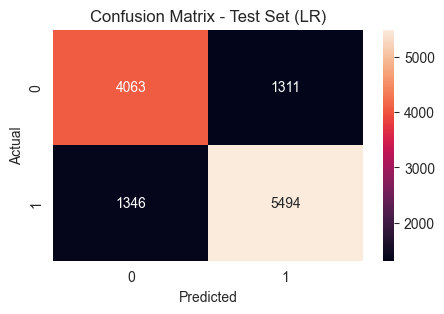

In [46]:
y_test_pred = best_model.predict(X_test)

print("Classification Report (Test Set):\n", classification_report(y_test, y_test_pred))
print("Test ROC AUC:", roc_auc_score(y_test, best_model.predict_proba(X_test)[:,1]))

plt.figure(figsize=(5, 3))
sns.heatmap(confusion_matrix(y_test, y_test_pred), annot=True, fmt='d')
plt.title("Confusion Matrix - Test Set (LR)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Random Forrest Classifier

### Hyperparameter Tuning for Random Forest

In [47]:
param_grid_rf = {
    'n_estimators': [100],
    'max_depth': [5, 10],           
    'min_samples_split': [5, 10],   
    'min_samples_leaf': [5, 10],    
    'max_features': ['sqrt', 'log2'],
    'bootstrap': [True]
}

grid_search_rf = GridSearchCV(
    estimator=RandomForestClassifier(random_state=42),
    param_grid=param_grid_rf,
    cv=5,
    scoring='accuracy',
    verbose=1
)

grid_search_rf.fit(X_train, y_train)
best_rf = grid_search_rf.best_estimator_

Fitting 5 folds for each of 16 candidates, totalling 80 fits


In [48]:
y_train_pred = best_rf.predict(X_train)
train_accuracy = accuracy_score(y_train, y_train_pred)
print("Training Accuracy:", train_accuracy)

Training Accuracy: 0.9818509320160476


In [49]:
cv_scores = cross_val_score(best_rf, X_train, y_train, cv=5, scoring='accuracy')
print("Cross-Validation Scores:", cv_scores)
print("Mean CV Score:", np.mean(cv_scores))
print("Std CV Score:", np.std(cv_scores))

Cross-Validation Scores: [0.98117069 0.97598253 0.98157751 0.97530022 0.9819869 ]
Mean CV Score: 0.9792035706688926
Std CV Score: 0.0029279112738877376


### Evaluate on Validation Set

--- Best Random Forest (Validation Set) ---
Accuracy: 0.9807597838545931
Precision: 0.9834254143646409
Recall: 0.9815201192250372
F1 Score: 0.9824718430670545
ROC-AUC Score: 0.9984137535524902

Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.98      0.98      5504
           1       0.98      0.98      0.98      6710

    accuracy                           0.98     12214
   macro avg       0.98      0.98      0.98     12214
weighted avg       0.98      0.98      0.98     12214



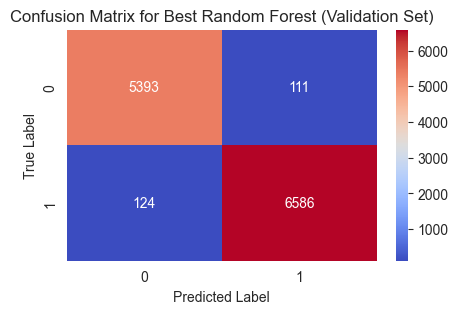

In [50]:
evaluate_classifier(best_rf, X_train, X_val, y_train, y_val, "Best Random Forest (Validation Set)")

#### Confusion Matrix

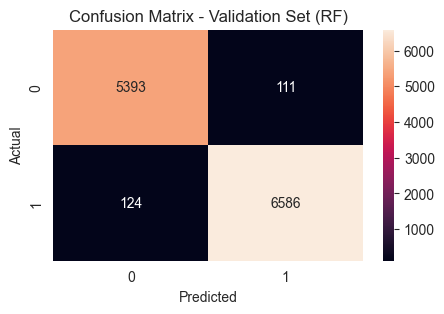

Classification Report (Validation Set):
               precision    recall  f1-score   support

           0       0.98      0.98      0.98      5504
           1       0.98      0.98      0.98      6710

    accuracy                           0.98     12214
   macro avg       0.98      0.98      0.98     12214
weighted avg       0.98      0.98      0.98     12214

Validation ROC AUC: 0.9984137535524902


In [51]:
y_val_pred = best_rf.predict(X_val)
plt.figure(figsize=(5, 3))
sns.heatmap(confusion_matrix(y_val, y_val_pred), annot=True, fmt='d')
plt.title("Confusion Matrix - Validation Set (RF)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

print("Classification Report (Validation Set):\n", classification_report(y_val, y_val_pred))
print("Validation ROC AUC:", roc_auc_score(y_val, best_rf.predict_proba(X_val)[:,1]))

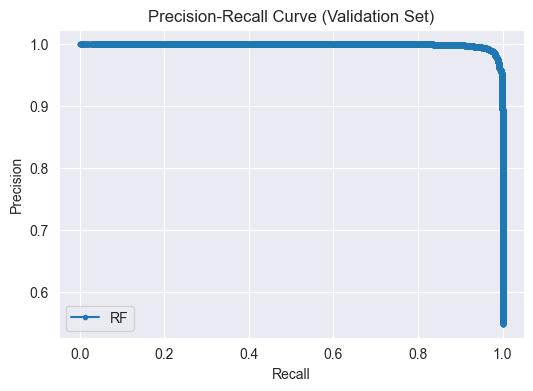

In [52]:
from sklearn.metrics import precision_recall_curve

y_val_scores = best_rf.predict_proba(X_val)[:, 1]
precision, recall, thresholds = precision_recall_curve(y_val, y_val_scores)
plt.figure(figsize=(6,4))
plt.plot(recall, precision, marker='.', label='RF')
plt.title('Precision-Recall Curve (Validation Set)')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend()
plt.show()

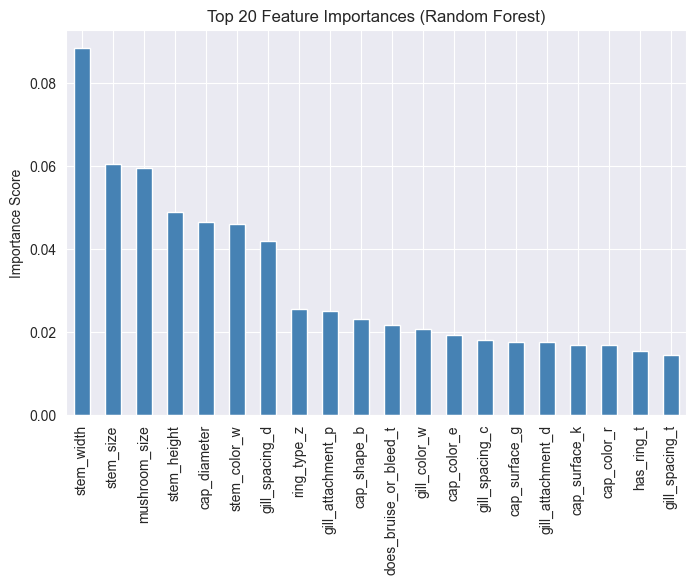

In [53]:
importances = best_rf.feature_importances_
feature_names = X_train.columns
feat_imp = pd.Series(importances, index=feature_names).sort_values(ascending=False)

plt.figure(figsize=(8,5))
feat_imp.head(20).plot(kind='bar', color='steelblue')
plt.title("Top 20 Feature Importances (Random Forest)")
plt.ylabel("Importance Score")
plt.show()


Classification Report (Test Set):
               precision    recall  f1-score   support

           0       0.98      0.98      0.98      5374
           1       0.98      0.98      0.98      6840

    accuracy                           0.98     12214
   macro avg       0.98      0.98      0.98     12214
weighted avg       0.98      0.98      0.98     12214

Test ROC AUC: 0.99859623006157


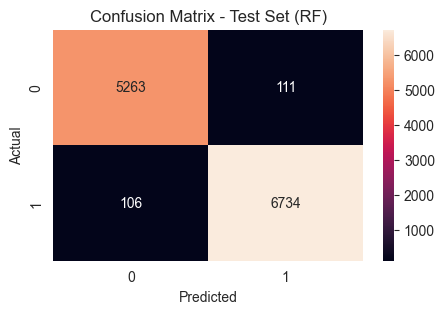

In [54]:
X_combined = pd.concat([X_train, X_val])
y_combined = pd.concat([y_train, y_val])
best_rf.fit(X_combined, y_combined)

y_test_pred = best_rf.predict(X_test)

print("Classification Report (Test Set):\n", classification_report(y_test, y_test_pred))
print("Test ROC AUC:", roc_auc_score(y_test, best_rf.predict_proba(X_test)[:,1]))

plt.figure(figsize=(5, 3))
sns.heatmap(confusion_matrix(y_test, y_test_pred), annot=True, fmt='d')
plt.title("Confusion Matrix - Test Set (RF)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [55]:
print("Hello")

Hello
